# Pics for convolution

slides, as well as lecture notes

In [1]:
import numpy as np
import math
import scipy.signal as sig
import matplotlib.pyplot as plt

In [2]:
kenta_img=plt.imread("kenta2_grau.png")
kenta=1-kenta_img

def downsize(img,factor):
    kernel=np.ones((factor,factor))/factor**2
    res=sig.convolve(img,kernel,mode="valid")
    return res[::factor,::factor]

small=downsize(kenta,4)

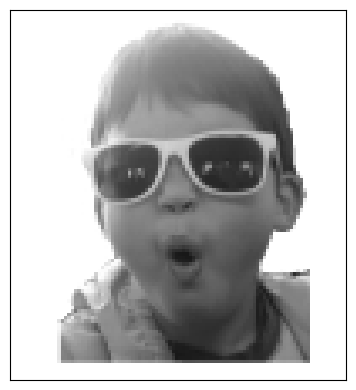

In [3]:
figsize=(4,4)
plt.figure(figsize=figsize)
plt.imshow(small,cmap="binary",vmin=0,vmax=1)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('kenta_small.png',dpi=300)

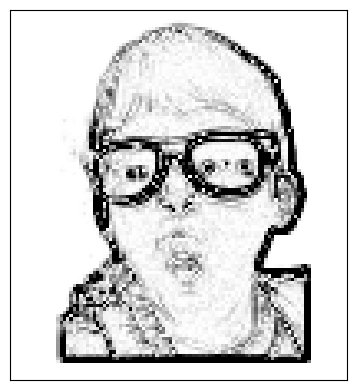

In [4]:
kernel=np.array([[-1,-2,-1],[-2,12,-2],[-1,-2,-1]])
edges=sig.convolve(small,kernel)
plt.figure(figsize=figsize)
plt.imshow(np.abs(edges),cmap='binary',vmin=0,vmax=1)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('kenta_edges.png',dpi=300)

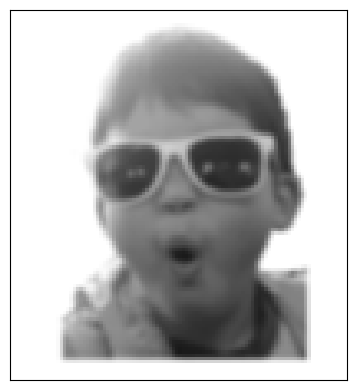

In [5]:
gauss=np.array([[1,2,1],[2,4,2],[1,2,1]])/16
blurred=sig.convolve(small,gauss)
plt.figure(figsize=figsize)
plt.imshow(np.abs(blurred),cmap='binary',vmin=0,vmax=1)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('kenta_blurred.png',dpi=300)

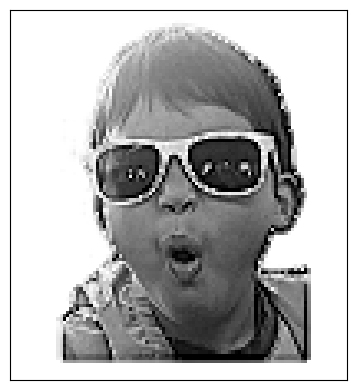

In [6]:
kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharper=sig.convolve(small,kernel)
plt.figure(figsize=figsize)
plt.imshow(np.abs(sharper),cmap='binary',vmin=0,vmax=1)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('kenta_sharp.png',dpi=300)

## Code for tikz in slides

In [7]:
A=np.array([[3., 3., 3., 3., 2., 3., 3., 3., 3.],
       [4., 3., 3., 3., 3., 3., 3., 3., 3.],
       [5., 5., 5., 4., 4., 3., 3., 3., 3.],
       [7., 7., 6., 6., 5., 4., 4., 3., 3.],
       [8., 8., 8., 7., 6., 6., 5., 4., 3.],
       [9., 9., 9., 9., 8., 8., 7., 6., 4.],
       [9., 9., 9., 9., 9., 9., 8., 7., 6.],
       [9., 9., 9., 9., 9., 9., 9., 9., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9.]])
kernel=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
result=sig.convolve(A,kernel,mode="valid")

def tikzify(A,arrayname):
    result="\\def\\"+arrayname+"{{"
    for row in A:
        strrow=[str(int(a)) for a in row]
        result+="{"+",".join(strrow)+"},"
    result=result[:-1]+"}}"
    return result

print(tikzify(kernel,"kernel"))
print(tikzify(A[1:-1,1:-1],"imgarray"))
print(tikzify(result,"resarray"))

\def\kernel{{{0,-1,0},{-1,4,-1},{0,-1,0}}}
\def\imgarray{{{3,3,3,3,3,3,3},{5,5,4,4,3,3,3},{7,6,6,5,4,4,3},{8,8,7,6,6,5,4},{9,9,9,8,8,7,6},{9,9,9,9,9,8,7},{9,9,9,9,9,9,9}}}
\def\resarray{{{-3,-2,-1,0,0,0,0},{0,2,-2,1,-2,-1,0},{2,-2,2,0,-2,1,-2},{0,2,-1,-2,1,-1,-1},{1,1,3,0,2,1,2},{0,0,0,1,2,0,-1},{0,0,0,0,0,1,3}}}
